<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [4]:
%cd ..
%load_ext autoreload
%autoreload 2


In [24]:
import pipeline
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [25]:
data_dir = os.getcwd() + "/experiments/batch_DA/"
df_AE = pd.read_csv(data_dir + "AE.csv")
df_SVD = pd.read_csv(data_dir + "SVD.csv")
df_SVD.head()

,Unnamed: 0,counts,da_MAE_mean,l1_loss,l2_loss,percent_improvement,ref_MAE_mean
0,0,240249,0.751122,13872.180,2638.3848,83.291652,4.495490
1,1,246642,0.795557,13944.003,3019.6277,96.621634,23.548581
2,2,229483,0.985657,19006.207,4186.5720,75.198379,3.974163
3,3,238301,0.726771,14569.712,2318.1840,82.928274,4.257160
4,4,241560,0.516633,12161.135,1899.7172,89.397046,4.872540


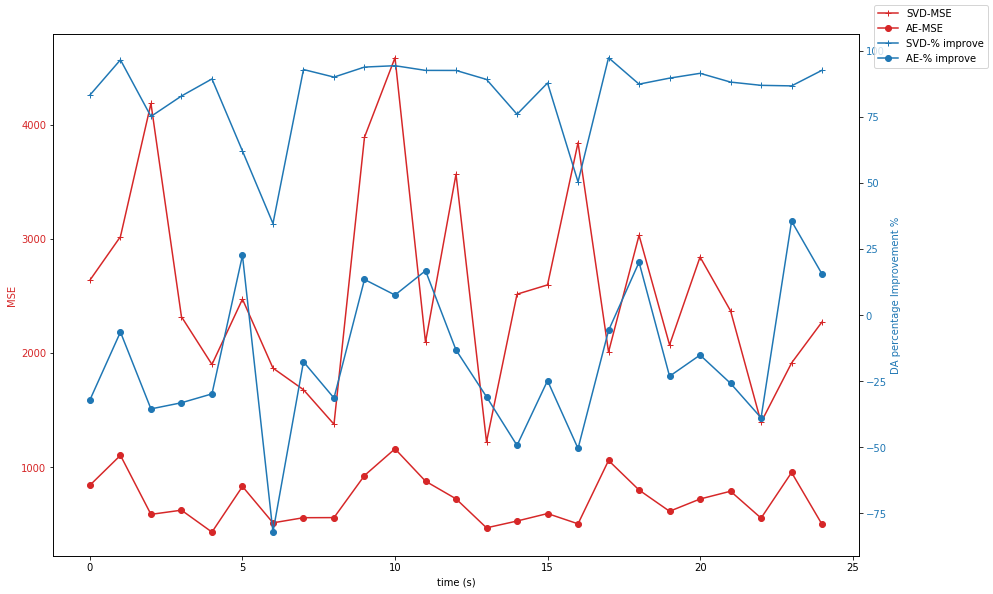

In [50]:
#Plot L2 on left axis and percent improvement on y axis against time
# Create some mock data
t = df.index
data1 = df["l2_loss"]
data2 = df["percent_improvement"]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('MSE', color=color)


# multiple line plot
ax1.plot( t, 'l2_loss', data=df_SVD, marker='+',   color=color, )
ax1.plot(t, 'l2_loss', data=df_AE, marker='o',  color=color)

ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('DA percentage Improvement %', color=color)  # we already handled the x-label with ax1

ax2.plot( t, 'percent_improvement', data=df_SVD, marker='+', color=color, )
ax2.plot(t, 'percent_improvement', data=df_AE, marker='o', color=color)

ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.legend(["SVD-MSE", "AE-MSE"] + ["SVD-% improve", "AE-% improve"])
fig.set_size_inches(15, 9)
plt.show()
